# The Empirical Rule

Use tests where you're add and that you inderstand.

We could just test for normallity with the emperical rule

Rules:
* 68%   of the data fall within 1 standard deviation of the mean
* 95%   of the data fall within 2 standard deviations of the mean
* 99.7% of the data fall within 3 standard deviations of the mean


## setup

* calculate the percentage change of the bitcoin 
* plot this in a histogram for the idea


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')

from functions import difference_returns


#standard import bitcoin data
dt = 900
key_open = "open"
key_high = "high"
key_low  = "low"
key_close = "close"

df = pd.read_csv("../BTCUSD.csv")
df = df[0:100]

19   -13.827000
86   -11.231333
89   -10.675000
13    -8.642333
3     -7.565333
        ...    
16     5.037667
94     5.274333
30     5.319667
90     6.096000
88    12.473667
Name: close, Length: 99, dtype: float64


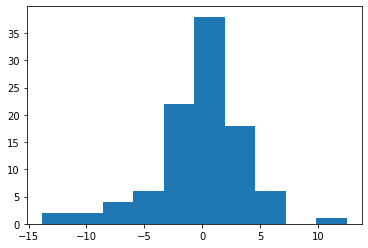

In [124]:
# we assume brownian motion and calculate the difference deviced by squired delta time
returns = difference_returns(df[key_close], dt)

# drop the first because it will be missing
returns = returns[1:]
returns = returns.sort_values()

print(returns)
plt.hist(returns)
plt.show() 

In [103]:
#calculate mean and standard deviation
mu = returns.mean()
std = returns.std()

print(mu)
print(std)
print("One std interval")
print(mu - std, " - ", mu + std)

-5.447702028352536e-06
0.0001275745681862496
One std interval
-0.00013302227021460213  -  0.00012212686615789708


* get all points between one, two and three std and calculate the percentage

In [104]:
# get all points between one standard deviation
# get all the points between two standard deviations
r1 = returns.loc[returns.gt(mu - std ) & returns.lt(mu + std)]
r2 = returns.loc[returns.gt(mu - std * 2 ) & returns.lt(mu + std * 2 )]
r3 = returns.loc[returns.gt(mu - std * 3 ) & returns.lt(mu + std * 3 )]
r4 = returns.loc[returns.gt(mu - std * 4 ) & returns.lt(mu + std * 4 )]
r5 = returns.loc[returns.gt(mu - std * 5 ) & returns.lt(mu + std * 5 )]
print(len(r1) / len(returns))
print(len(r2) / len(returns))
print(len(r3) / len(returns))
print(len(r4) / len(returns))

0.7676767676767676
0.9494949494949495
0.9797979797979798
1.0


False


In [121]:
def empirical_rule_quartiles(s: pd.Series) -> list:
    s = s.copy()

    mu = s.mean()
    std = s.std()
    r1 = s.loc[s.gt(mu - std) & s.lt(mu + std)]
    r2 = s.loc[s.gt(mu - std * 2) & s.lt(mu + std * 2)]
    r3 = s.loc[s.gt(mu - std * 3) & s.lt(mu + std * 3)]
    r4 = s.loc[s.gt(mu - std * 4) & s.lt(mu + std * 4)]

    q1 = round(len(r1) / len(s), 2)
    q2 = round(len(r2) / len(s), 2)
    q3 = round(len(r3) / len(s), 2)
    q4 = len(r4) / len(s)
    return [q1, q2, q3, q4]

# we assume brownian motion and calculate the difference deviced by squired delta time
returns = df[key_close].pct_change() / np.sqrt(dt)
    
# drop the first because it will be missing
returns = returns[1:]
    

print(empirical_rule_quartiles(returns))

[0.77, 0.95, 0.98, 1.0]


In [118]:

# the final function
def empirical_rule(s: pd.Series) -> bool:
    q = empirical_rule_quartiles(s)
    return q[0] >= 0.68  and q[1] >= 0.95 and q[2] >= 0.997

print(empirical_rule(returns))


False
